This notebook produces explanations using the Shapley-Taylor Interaction Index

In [1]:
import sys
import nshap
import pickle
import warnings
import pandas as pd
sys.path.append('../')
warnings.filterwarnings("ignore")

In [2]:
# load, clean and shape the data
train_data = pd.read_pickle('../data/explainability_input/train_data.pkl')
x_train_data = train_data.drop(columns=['id', 'date', 'cluster'])
feature_names = x_train_data.columns
x_train_data = x_train_data.to_numpy()
test_data = pd.read_pickle('../data/explainability_input/test_data.pkl')
x_test_data = test_data.drop(columns=['id', 'date', 'cluster'])
x_test_data = x_test_data.to_numpy()

In [3]:
# load the model
with open('../models/svc.pkl', 'rb') as file:  
    model = pickle.load(file)

In [4]:
# initialize the value function
vfunc = nshap.vfunc.interventional_shap(
    model.predict_proba, 
    x_train_data, 
    target=1, #TODO: change between 0 and 1 for the actual cluster
    num_samples=100)  #TODO: change to len(x_train_data) for the whole x test

In [5]:
# extract the raw Shapley-Taylor Interaction index
shapley_taylor = nshap.shapley_taylor(
    x_test_data[0, :3], #TODO: add manually the index of the instance you want to explain
    vfunc, 
    n=2) #order of the interaction
shapley_taylor

{(0,): 0.010597231502472049, (1,): -0.006497570185893697, (2,): 0.06061602178353043, (0, 1): 0.005527776890313733, (0, 2): -0.0012816162547715968, (1, 2): -0.0036813400862334054}

In [ ]:
# TODO: split per feature in order to can be added in the dataframe
# or not (?) thing more 

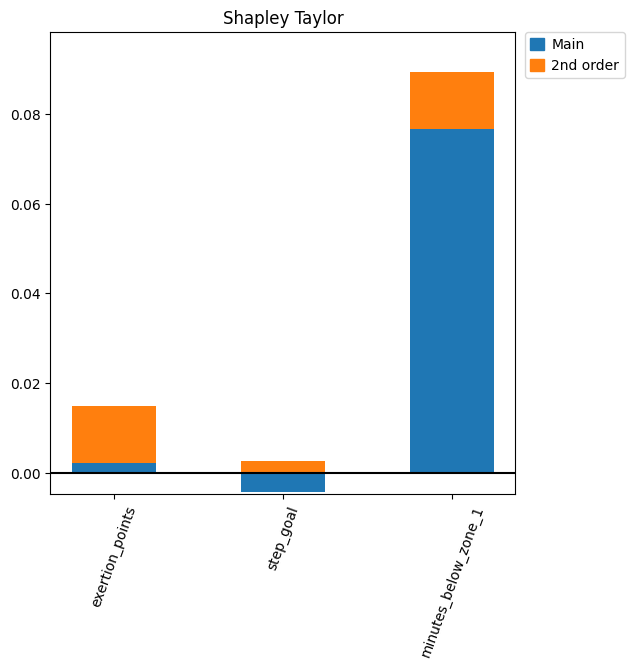

<Axes: title={'center': 'Shapley Taylor'}>

In [15]:
# visualize the Shapley-Taylor Interaction indeces
shapley_taylor.plot(feature_names = feature_names[:3]) 